In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from collections import Counter

fp_databse = "data/database_640.pkl"
database = pd.read_pickle(fp_databse)

folder_figures = 'figures'

<Figure size 432x432 with 0 Axes>

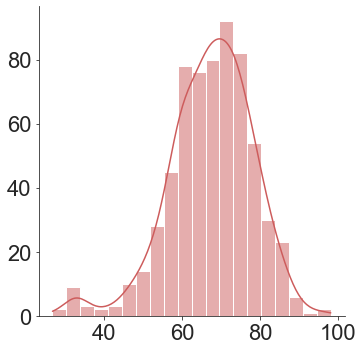

In [2]:
# Distribution of measured Tm

mean_tm = "{:.2f}".format(np.mean(database['tm']))

sns.set_style('white', {'axes.spines.right':False, 'axes.spines.top': False,
                    'xtick.bottom': True, 'ytick.left': True})
plt.figure(figsize=(6,6))

sns.displot(database, x="tm", bins=20, kde=True, color='indianred')
plt.xlabel(f"", fontsize=15)
plt.ylabel(f"", fontsize=15)
#plt.title(f"Measured Melting Temperature \naverage Tm = {mean_tm}", fontsize=18, y=1.02)
plt.tick_params(bottom=True, left=True, labelsize=22)
#plt.ylim(0,95)
plt.savefig(os.path.join(folder_figures, 'fiure3a.png'), dpi=800, bbox_inches='tight', transparent=True)
plt.show()
plt.close()


{'DSC', 'nanoDSF', 'DSF (SYPRO)', 'Circular dichroism', 'Other'}
Counter({'nanoDSF': 251, 'CD': 205, 'DSF': 165, 'DSC': 15, 'Other': 4})


<ipython-input-3-e44ab6a9f827>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=database, x="exp_method", linewidth=0.8,


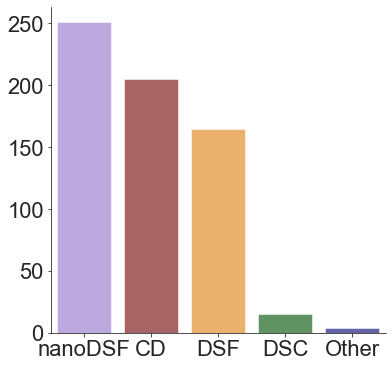

In [3]:
# Distribution of Tm measurement methods

sns.set_style('white', {'axes.spines.right':False, 'axes.spines.top': False,
                    'xtick.bottom': True, 'ytick.left': True})
plt.figure(figsize=(6,6))

# Some renaming
exp_methods = database['exp_method'].to_list()
print(set(database['exp_method']))

exp_methods = ['CD' if item == 'Circular dichroism' else item for item in exp_methods]
exp_methods = ['DSF' if item == 'DSF (SYPRO)' else item for item in exp_methods]
database['exp_method'] = exp_methods

# Print count of each method
print(Counter(database['exp_method'].to_list()))
exp_methods_order = ['nanoDSF', 'CD','DSF', 'DSC',  'Other']
#database['exp_method'] = pd.Categorical(database['exp_method'], categories=exp_methods_order, ordered=True)

# Define specific colors for each category
colors = ['mediumpurple', 'darkred', 'darkorange', 'darkgreen', 'darkblue' ]

# Create a dictionary mapping each method to a specific color
method_color_dict = dict(zip(exp_methods_order, colors))

# Plot the count of each method with different colors
ax = sns.countplot(data=database, x="exp_method", linewidth=0.8,
                   palette=method_color_dict, order=exp_methods_order, alpha=0.65)
# Add count labels on each bar
# for p in ax.patches:
#     ax.annotate(format(p.get_height(), '.0f'), 
#                 (p.get_x() + p.get_width() / 2., p.get_height()), 
#                 ha = 'center', va = 'center', 
#                 xytext = (0, 6), 
#                 textcoords = 'offset points',
#                 fontsize=20)

ax.tick_params(bottom=True, left=True, labelsize=22)
ax.set_xlabel('', fontsize=15)
ax.set_ylabel('', fontsize=15)
#ax.set_ylim(0,300)
ax.tick_params(bottom=True, left=True, labelsize=22)

# Include average Tm values for each method
exp_methods = exp_methods_order #['nanoDSF', 'CD', 'DSF\n(SYPRO)', 'DSC', 'Other']
tm_means, tm_stds = [], []

for method in exp_methods:
    sub_df = database[database['exp_method']==method]
    tm_mean = np.mean(sub_df['tm'])
    tm_std = np.std(sub_df['tm'])

    tm_means.append(tm_mean)
    tm_stds.append(tm_std)

# # Plot the average tm values
# ax2 = ax.twinx()
# ax2_color = "tab:red"
# tm_latex = r"$T_m$"
# ax2.errorbar(exp_methods, tm_means, yerr=tm_stds, fmt='o', color=ax2_color)
# ax2.set_ylim(0, 100)
# ax2.set_ylabel(f'Measured {tm_latex} / °C', fontsize=18, color=ax2_color)

# ax2.tick_params(axis='y', colors=ax2_color, labelsize=20)
# ax2.spines['right'].set_color(ax2_color)
plt.savefig(os.path.join(folder_figures, 'figure3b.png'), dpi=800, bbox_inches='tight', transparent=True)
plt.show()
plt.close()


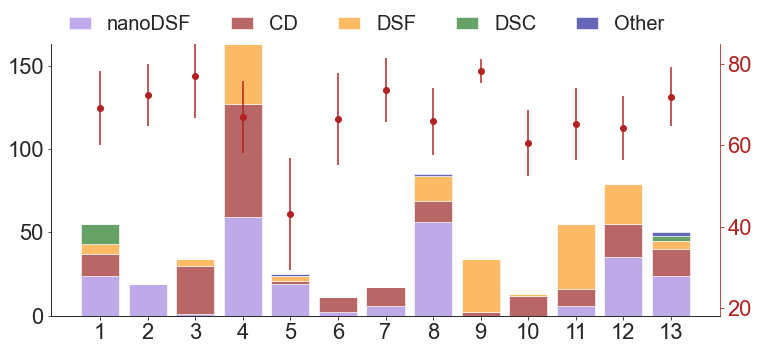

In [4]:
# Distribution of sequence clusters
database = pd.read_pickle(fp_databse)
strat_method = 'clust_kmedoids_blosum'

data = {}
for exp in set(database['exp_method']):
	data[exp] = list()

# Find mean and std of tms for each clust_kmeans
clust_kmeans, tm_mean_kmeans, tm_std_kmeans = [],[],[]
for cluster in list(sorted(set(database[strat_method].values))):
	sub_df = database[database[strat_method]==cluster]
	sub_tm = sub_df['tm'].values
	mean = np.mean(sub_tm)
	std = np.std(sub_tm)

	clust_kmeans.append(cluster+1)
	tm_mean_kmeans.append(mean)
	tm_std_kmeans.append(std)

	# Compute nb exp methods 
	exp_for_clust = Counter(sub_df['exp_method'])
	for exp in data:
		if exp not in exp_for_clust:
			data[exp].append(0)
		else: 
			data[exp].append(exp_for_clust[exp])



re_nbered = list()
for clust_nb in database[strat_method]:
	re_nbered.append(clust_nb+1)

database[strat_method] = re_nbered

# Create count plot
colors = ['mediumpurple', 'darkred', 'darkorange', 'darkgreen', 'darkblue' ]
fig, ax = plt.subplots(figsize=(12,5))
sns.set_style('white', {'axes.spines.right':True, 'axes.spines.top': False,
                    'xtick.bottom': True, 'ytick.left': True})
# ax = sns.countplot(data=database, x=strat_method, 
#                 palette=palette, alpha=0.75)

data['clust'] = range(1,len(set(clust_kmeans))+1)

# Create DataFrame
df = pd.DataFrame(data)
df = df.rename(columns={"DSF (SYPRO)": "DSF", 'Circular dichroism': 'CD'})

exp_methods_order = ['nanoDSF', 'CD', 'DSF', 'DSC', 'Other']

# Set the 'Cluster' column as the index
df.set_index('clust', inplace=True)

# Define the bottom position for stacking
bottom = [0] * df.shape[0]
# Plot each label
for i, label in enumerate(exp_methods_order):
	ax.bar(df.index, df[label], bottom=bottom, color=colors[i], label=label, alpha=0.60)
	# Update the bottom position
	bottom = [i + j for i, j in zip(bottom, df[label])]




legend = plt.legend(loc='lower left', bbox_to_anchor=(0,0.97,1,0.2), ncol=5,frameon=True, 
                    markerscale=1.6, fontsize=20, edgecolor = 'w', handlelength=1.1, handleheight=0.55)

# ax.set_ylim(0, 180)
ax.set_ylabel('', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=22)
ax.set_xlabel('', fontsize=15)
ax.set_xticks(range(1,len(set(data['clust']))+1))

# Include average Tm values for each cluster
ax2 = ax.twinx()
ax2_color = "firebrick"
ax2.errorbar(clust_kmeans, tm_mean_kmeans, yerr=tm_std_kmeans, fmt='o', color=ax2_color)
ax2.set_ylim(18, 85) 


ax2.spines['right'].set_color(ax2_color)
ax2.tick_params(axis='y', colors=ax2_color, labelsize=22)

plt.savefig(os.path.join(folder_figures, 'figure3d.png'), dpi=800, bbox_inches='tight', transparent=True)
plt.show()
plt.close()